# Classification Casestudy

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

## Importing the dataset

In [2]:
df = pd.read_csv('breast_cancer.csv')
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Exploratory Data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [4]:
df.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

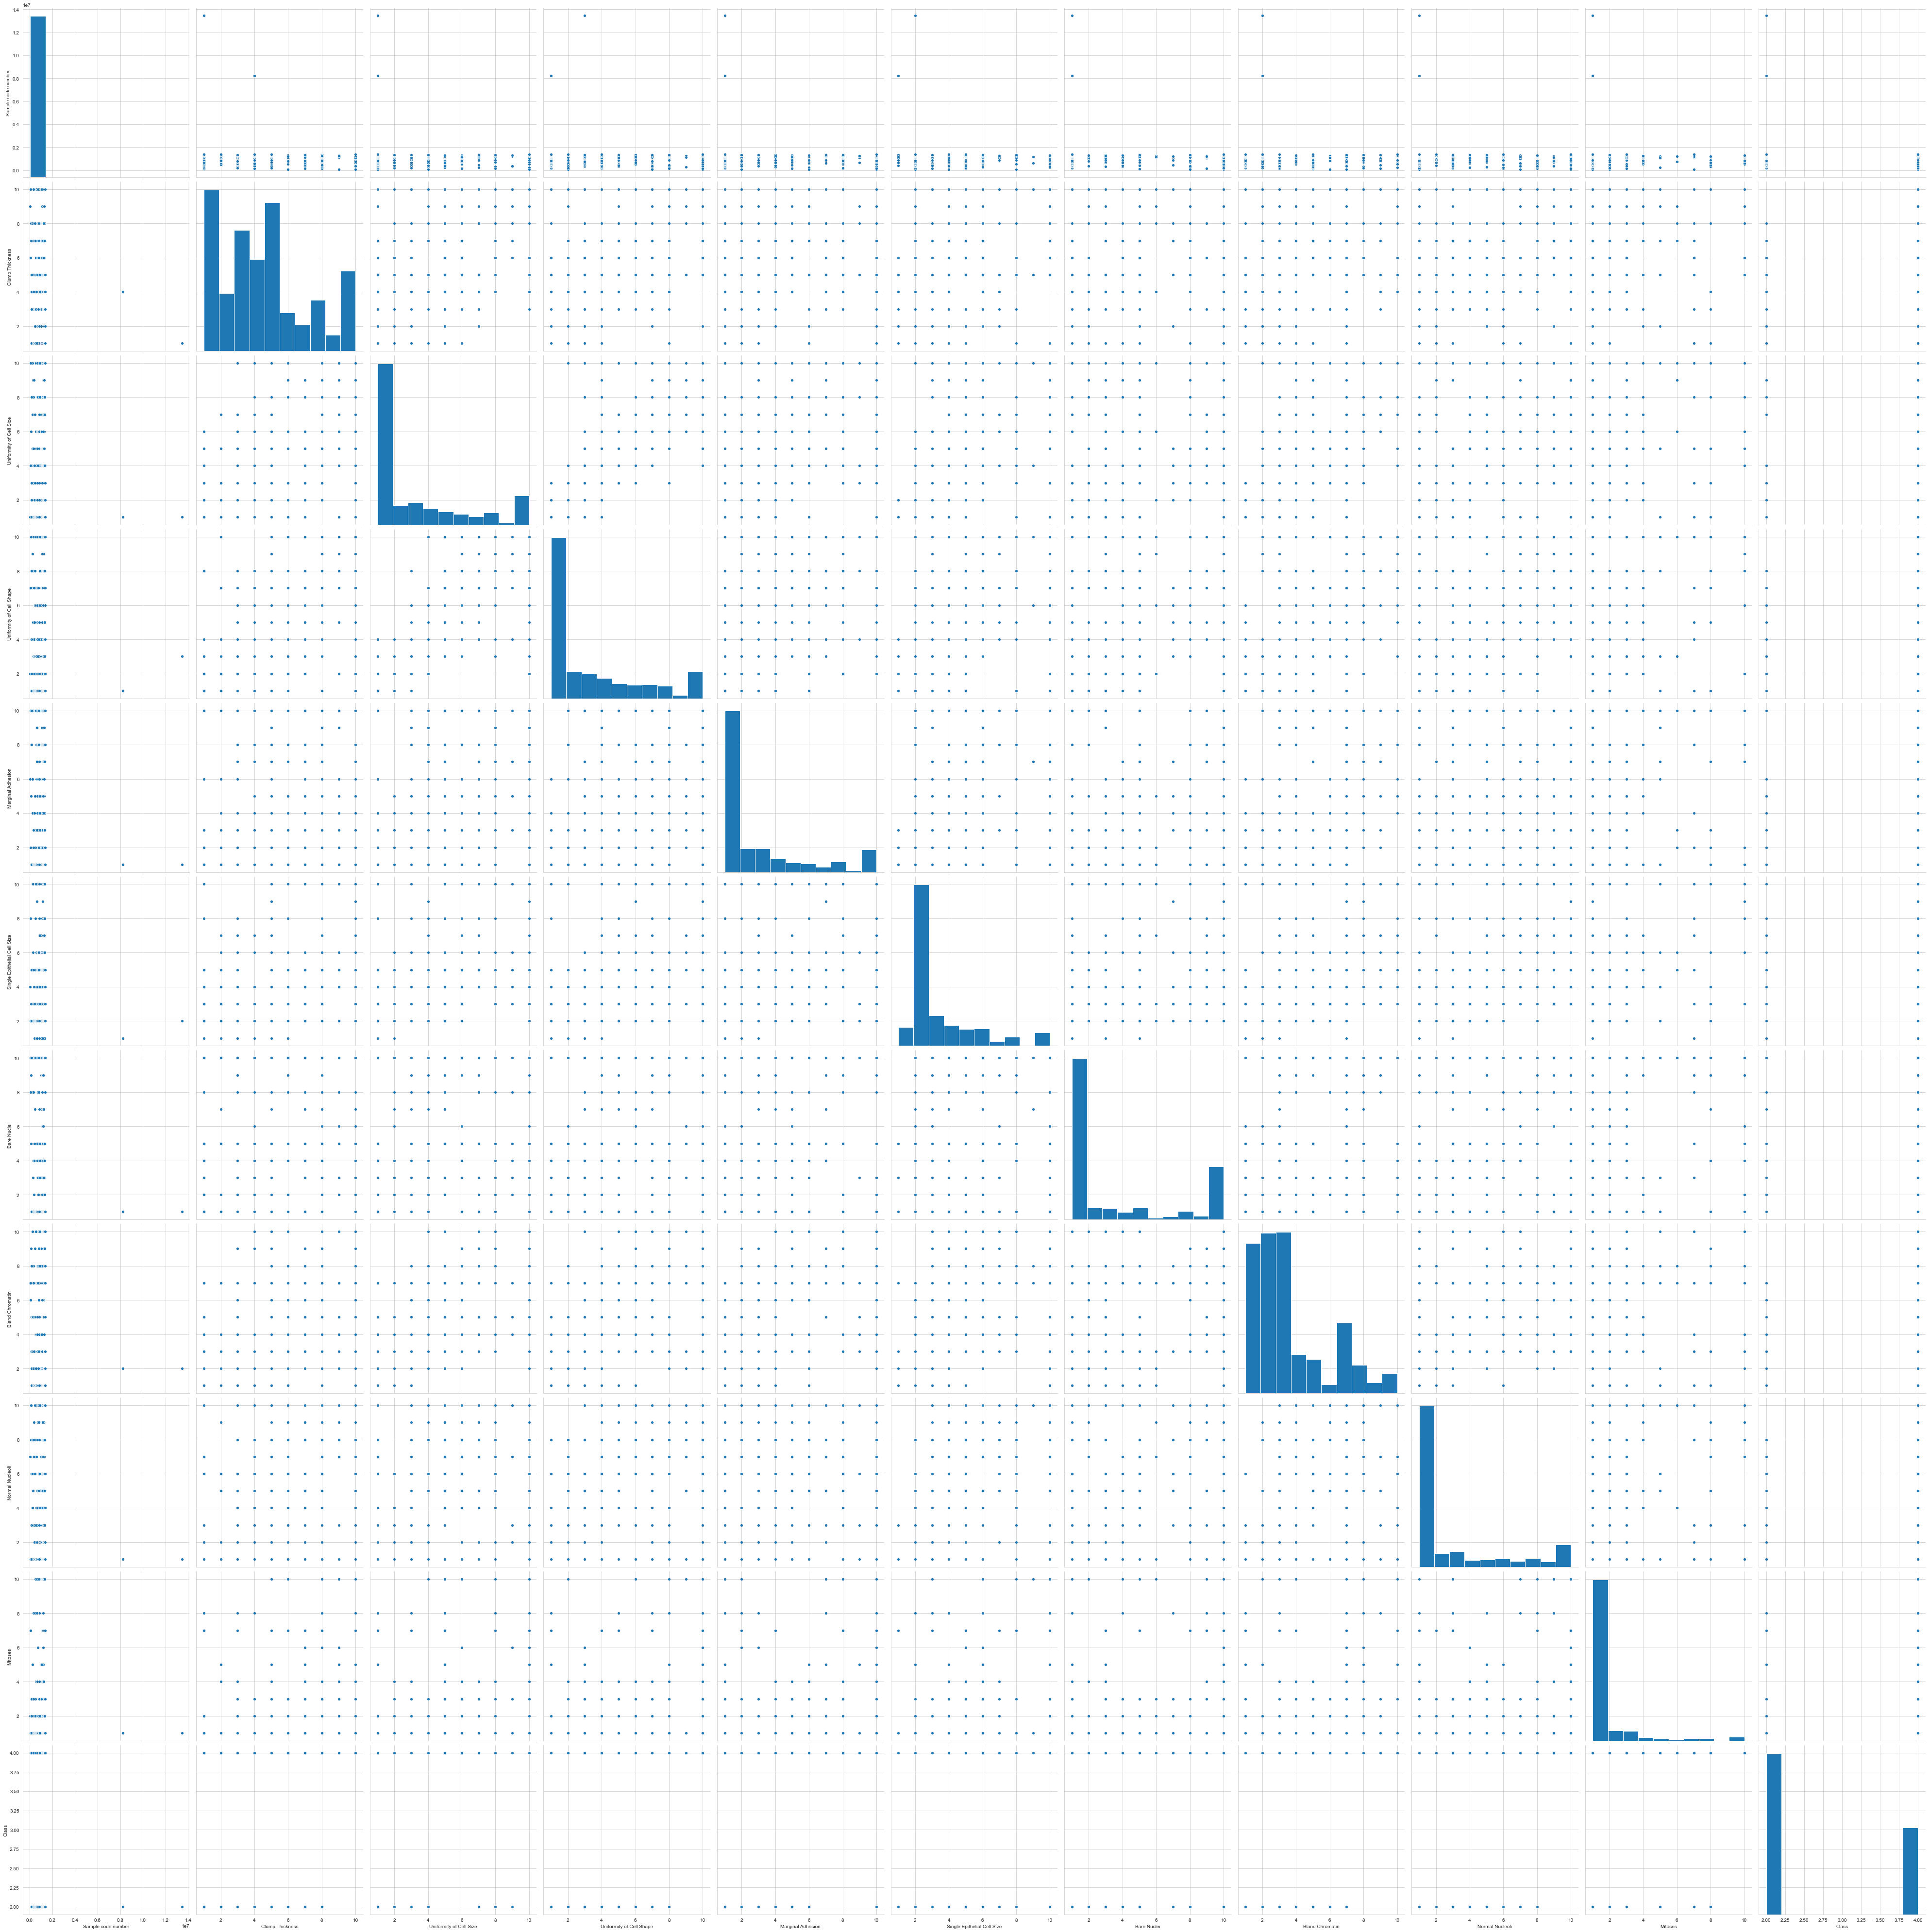

In [5]:
sns.set_style(style='whitegrid')
sns.pairplot(df,height=5)

In [6]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
df.corr()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
Clump Thickness,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity of Cell Size,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


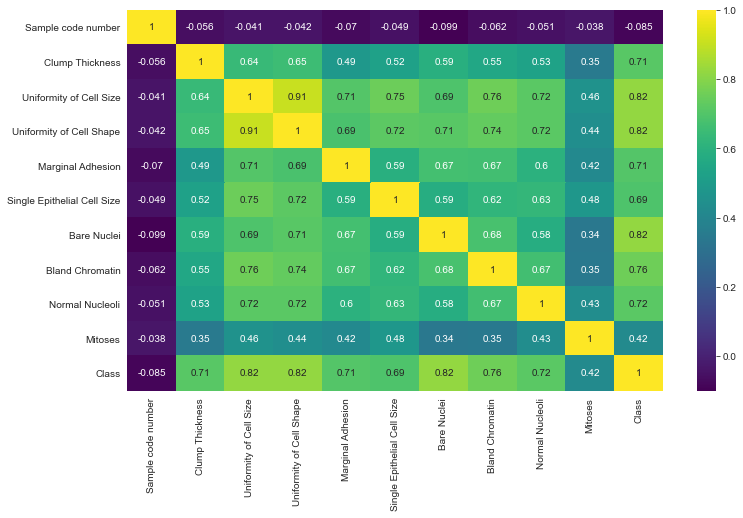

In [8]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

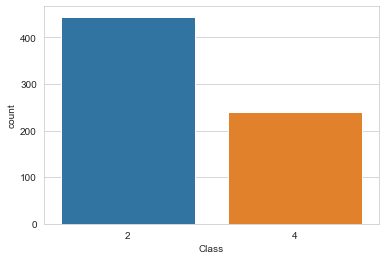

In [9]:
sns.countplot(x='Class',data=df)

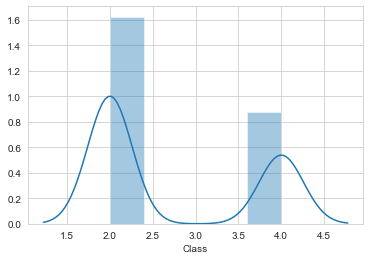

In [10]:
sns.distplot(df['Class'])

In [11]:
df.corr()['Class'].sort_values()

Sample code number            -0.084701
Mitoses                        0.423448
Single Epithelial Cell Size    0.690958
Marginal Adhesion              0.706294
Clump Thickness                0.714790
Normal Nucleoli                0.718677
Bland Chromatin                0.758228
Uniformity of Cell Size        0.820801
Uniformity of Cell Shape       0.821891
Bare Nuclei                    0.822696
Class                          1.000000
Name: Class, dtype: float64

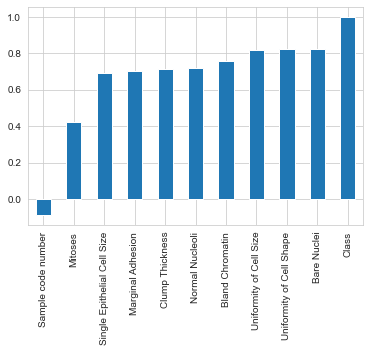

In [12]:
df.corr()['Class'].sort_values().plot(kind='bar')

## Splitting the dataset into the Training set and Test set

In [13]:
x = df.iloc[:,1:-1]
y = df.iloc[:,-1]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=0)

## Feature Scaling

In [14]:
sc =StandardScaler()
xtrain= sc.fit_transform(xtrain)
xtest =sc.transform(xtest)

## Training & Evaluating the Model Performance

In [15]:
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors=9)))
models.append(('Lreg',LogisticRegression()))
models.append(('SVM',SVC(kernel='linear')))
models.append(('KVM',SVC(kernel='rbf')))
models.append(('GNB',GaussianNB()))
models.append(('DTC',DecisionTreeClassifier(criterion='entropy')))
models.append(('RFC',RandomForestClassifier(n_estimators=11,criterion='entropy')))

for name,model in models:
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(f'{name}\n Accuracy: {accuracy_score(ytest,ypred)}\n\n Confusion Matrix:-\n{confusion_matrix(ytest,ypred)}\nClassification Report:-\n{classification_report(ytest,ypred)}\n')
    

KNN
 Accuracy: 0.9532163742690059

 Confusion Matrix:-
[[103   4]
 [  4  60]]
Classification Report:-
              precision    recall  f1-score   support

           2       0.96      0.96      0.96       107
           4       0.94      0.94      0.94        64

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171


Lreg
 Accuracy: 0.9473684210526315

 Confusion Matrix:-
[[103   4]
 [  5  59]]
Classification Report:-
              precision    recall  f1-score   support

           2       0.95      0.96      0.96       107
           4       0.94      0.92      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171


SVM
 Accuracy: 0.9415204678362573

 Confusion Matrix:-
[[102   5]
 [  5  59]]
Classification Report:-
              precision    recall  f1

## Model Optimization

In [16]:
results = []
names = []

for name,model in models:
    kfold = KFold(n_splits=10,random_state=0)
    cvs = cross_val_score(model,xtrain,ytrain,cv=kfold,scoring='accuracy')
    results.append(cvs)
    names.append(name)
    print(f'{name}:   Max Accuracy-:{max(cvs)*100}    Avg.Accuracy-:{cvs.mean()*100:3f}%     Std-:{cvs.std()*100:3f}%')

KNN:   Max Accuracy-:100.0    Avg.Accuracy-:97.850679%     Std-:2.040733%
Lreg:   Max Accuracy-:100.0    Avg.Accuracy-:96.481900%     Std-:1.922859%
SVM:   Max Accuracy-:100.0    Avg.Accuracy-:97.266214%     Std-:1.996801%
KVM:   Max Accuracy-:100.0    Avg.Accuracy-:97.466063%     Std-:2.140624%
GNB:   Max Accuracy-:100.0    Avg.Accuracy-:96.877828%     Std-:2.171487%
DTC:   Max Accuracy-:100.0    Avg.Accuracy-:95.124434%     Std-:2.788106%
RFC:   Max Accuracy-:100.0    Avg.Accuracy-:97.266214%     Std-:2.180860%
